In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from timeit import default_timer
from time import sleep
from copy import copy
import matplotlib
from lmfit import CompositeModel, Model
import os, pickle

matplotlib.rcParams['figure.figsize'] = (4.5, 3)

# cm = plt.get_cmap('tab10') 
cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=1.2)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

# from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Physicalv2 import FFCCLattice_physicalv2
# from FusionLatticesAnalysis.FFCCLattice_BranchFusion_Testv2 import decoder_successprob_error_vs_loss_list_parallelized as decoder_v2

from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Chain import FFCCLattice_chain
# from FusionLatticesAnalysis.FFCCLattice_Chain_Decoder import decoder_successprob_error_vs_loss_list_parallelized as decoder
from FusionLatticesAnalysis.FFCCLattice_Chain_Encoded import decoder_successprob_error_vs_loss_list_parallelized_encoded as decoder
# from FusionLatticesAnalysis.FFCCLattice_Chain_Encoded import resource_time_parallelized_encoded as time_cost_decoder


Loaded C++ linear algebra functions for Windows OS
Loaded C++ linear algebra functions for Windows OS


# Reproduce loss threshold simulation

In [3]:
# run loss g2
p_fusion_fail = 0.5; log_op_axis = 'z'
num_trials = 1000
L_list = np.array([[4, 4, 4],[6, 6, 6]])
eras_ps = np.linspace(0.055, 0.10, 20)
err_vs_eras_vals = np.array([(0, eras_p, 0) for eras_p in eras_ps])

start_t = default_timer()
"Replace m below"
m = 10 # number of arms in the logical qubit
Chain_m10_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    Lx,Ly,Lz = L
    this_data = decoder(err_vs_eras_vals, p_fusion_fail, Lx, Ly, Lz, m, log_op_axis, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1, 
                noise_mechanism='RUS',decoding_weights='None')
    Chain_m10_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

log_err_rate = Chain_m10_data; figure_name = 'Chain_m10_data'
data_to_save = {'L_list': L_list, 'eras_ps': eras_ps, 'log_err_rate': log_err_rate}
# "Replace m above"

   Doing L= [4 4 4]
Simulating errors...
Start pooling...
   Doing L= [6 6 6]
Simulating errors...
Start pooling...
Completed in  287.1993038000073  s


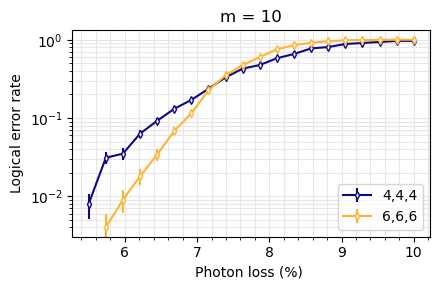

In [4]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
for L_ix, L in enumerate(L_list):
    Lx = L[0]; Ly = L[1]; Lz = L[2]
    plt.errorbar(eras_ps*100, log_err_rate[L_ix],
     yerr=(log_err_rate[L_ix] * (1 - log_err_rate[L_ix]) / num_trials) ** 0.5,marker='d',ms=4,markerfacecolor='white',
      markeredgewidth=1,label=r"{},{},{}".format(Lx,Ly,Lz), color = plots_colors[L_ix])
plt.yscale('log');plt.xlabel("Photon loss (%) ");plt.ylabel("Logical error rate")
plt.title(f'm = {m}');plt.minorticks_on();#plt.legend(loc=(1.05,0))
plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()

# plt.savefig('C:\\Users\\Ming-LaiChan\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Figures\\'+figure_name+'.png'
#             , dpi=350,bbox_inches='tight',transparent=True)
# saving_folder = 'C:\\Users\\Ming-LaiChan\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Pickle'
# file_name = figure_name + '.pickle'
# with open(os.path.join(saving_folder, file_name), 'wb') as handle:
#     pickle.dump(data_to_save, handle)

In [ ]:
# Estimate time cost

In [2]:
# run loss g2
p_fusion_fail = 0.5; log_op_axis = 'z'
num_trials = 1000
L_list = np.array([[4, 4, 4],[6, 6, 6],[8, 8, 8]])
# eras_ps = np.linspace(0.055, 0.10, 20)
eras_ps = np.linspace(0.0002, 0.11, 30)
err_vs_eras_vals = np.array([(0, eras_p, 0) for eras_p in eras_ps])

start_t = default_timer()
"Replace m below"
m = 10 # number of arms in the logical qubit
log_err_rate_Chain_m10_data = []
time_Chain_m10_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    Lx,Ly,Lz = L
    this_data = time_cost_decoder(err_vs_eras_vals, p_fusion_fail, Lx, Ly, Lz, m, log_op_axis, num_loss_trials=num_trials, num_ec_runs_per_loss_trial=1, 
                noise_mechanism='RUS',decoding_weights='None')
    log_err_rate_Chain_m10_data.append(this_data[:,0])
    time_Chain_m10_data.append(this_data[:,1])
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')

log_err_rate = log_err_rate_Chain_m10_data; figure_name = 'Chain_m10_data'
time_cost = time_Chain_m10_data
data_to_save = {'L_list': L_list, 'eras_ps': eras_ps, 'log_err_rate': log_err_rate, 'time_cost': time_cost}
# "Replace m above"

   Doing L= [4 4 4]
Simulating errors...
Start pooling...
   Doing L= [6 6 6]
Simulating errors...
Start pooling...
   Doing L= [8 8 8]
Simulating errors...
Start pooling...
Completed in  1928.174895000062  s


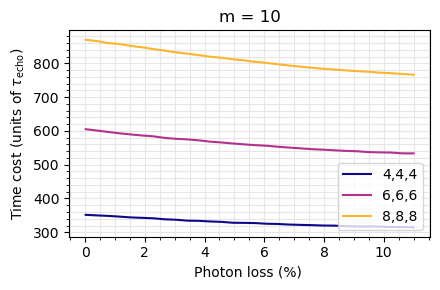

In [23]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
for L_ix, L in enumerate(L_list):
    Lx = L[0]; Ly = L[1]; Lz = L[2]
#     plt.errorbar(eras_ps*100, log_err_rate[L_ix],
#      yerr=(log_err_rate[L_ix] * (1 - log_err_rate[L_ix]) / num_trials) ** 0.5,marker='d',ms=4,markerfacecolor='white',
#       markeredgewidth=1,label=r"{},{},{}".format(Lx,Ly,Lz), color = plots_colors[L_ix])
    plt.plot(eras_ps*100, time_cost[L_ix],label=r"{},{},{}".format(Lx,Ly,Lz), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Time cost (units of $\tau_{\text{echo}}$)")
plt.title(f'm = {m}');plt.minorticks_on();#plt.legend(loc=(1.05,0))
plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()

plt.savefig('C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Figures\\'+figure_name+'.png'
            , dpi=350,bbox_inches='tight',transparent=True)
saving_folder = 'C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Pickle'
file_name = figure_name + '.pickle'
with open(os.path.join(saving_folder, file_name), 'wb') as handle:
    pickle.dump(data_to_save, handle)

In [44]:
time_cost

[array([351.654, 349.952, 348.436, 346.316, 343.932, 342.71 , 341.358,
        338.374, 337.078, 334.384, 333.842, 332.024, 330.82 , 328.196,
        327.868, 327.192, 325.26 , 324.594, 322.828, 321.912, 321.112,
        319.976, 319.644, 318.038, 316.922, 317.234, 316.934, 315.604,
        315.506, 314.614]),
 array([605.018, 600.98 , 596.82 , 592.77 , 589.398, 586.326, 583.872,
        579.194, 576.486, 574.846, 572.016, 568.1  , 565.738, 562.776,
        560.13 , 557.762, 556.078, 553.082, 550.628, 548.348, 545.948,
        544.408, 542.558, 540.794, 539.732, 537.336, 536.416, 535.92 ,
        533.558, 533.436]),
 array([869.772, 865.592, 859.644, 856.926, 851.312, 847.188, 842.078,
        837.334, 832.298, 828.564, 824.2  , 819.514, 816.314, 812.126,
        808.638, 804.222, 801.106, 797.18 , 793.396, 789.966, 786.828,
        783.814, 781.54 , 779.02 , 776.706, 774.94 , 772.256, 770.664,
        768.558, 766.142])]

In [48]:
m_max = 10; p_loss = 0; p_fusion_success = 0.5; L=8
def outputdot(p_loss,m_max,p_fusion_success):
    probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_index = [i+1 for i in range(m_max)]

    # Probabilities for getting logical ZZ in different numbers of attempts
    probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])

    # Probabilities for getting logical XX in different numbers of attempts
    probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])

    return np.dot(probs_XXZZ_attempt_list+probs_ZZ_attempt_list+probs_erasure_attempt_list+probs_XX_attempt_list,np.array(attempt_index))
(2*outputdot(0.1,m_max,p_fusion_success)+1)*6*L

429.0767781652176

In [20]:
np.multiply(probs_XXZZ_attempt_list+probs_ZZ_attempt_list+probs_erasure_attempt_list+probs_XX_attempt_list,np.array(attempt_index))

array([1.        , 1.        , 0.75      , 0.5       , 0.3125    ,
       0.1875    , 0.109375  , 0.0625    , 0.03515625, 0.01953125])

In [15]:
np.multiply(np.array([1,2,3]),np.array([1,2,3]))

array([1, 4, 9])

In [9]:
time_cost

[array([352.788, 349.78 , 348.514, 345.67 , 343.562, 342.544, 340.874,
        338.776, 337.32 , 335.22 , 333.958, 332.834, 331.292, 329.126,
        327.248, 326.378, 324.452, 323.494, 322.836, 322.342, 320.16 ,
        319.622, 318.752, 317.976, 316.89 , 317.176, 315.274, 315.48 ,
        314.998, 314.022]),
 array([603.778, 600.316, 597.262, 593.634, 589.952, 586.664, 583.51 ,
        580.214, 576.378, 574.168, 570.342, 568.956, 566.428, 563.166,
        559.814, 557.778, 554.45 , 552.862, 550.446, 548.   , 546.374,
        544.64 , 542.894, 540.456, 540.232, 538.044, 536.26 , 535.476,
        534.292, 533.022])]

In [ ]:
3*6*4,21*6*4,21*6*6,21*6*8

In [7]:
# RUS functions for sampling logical fusion outcomes, set r=0 to get p_XXZZ_RUS_func
def p_XXZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_success = (1-p_fail)*( 1 - p_e_XX ) # prob of not getting both physical XX and ZZ fusion outcome 
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = eta**2 * p_success + eta**2 * p_success * ( (1- (eta**2*p_fail_but_XX)**N_rep) / (1-eta**2*p_fail_but_XX) - 1)
    return result

def p_ZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = 1- (p_XXZZ_dist_func(eta, N_rep, r, p_fail = p_fail) + p_XX_dist_func(eta, N_rep, r, p_fail = p_fail) + p_erase_dist_func(eta, N_rep, r, p_fail = p_fail)) # if writing in 1-a-b-c this gives floating point error where N_rep=1 it is negative
    return result

def p_XX_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    return (p_fail_but_XX*eta**2)**N_rep

def p_erase_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    p_fail_no_XX = p_fail * (p_e_XX)
    p_success_no_XX = (1-p_fail) * (p_e_XX)
    if eta == 1: # consider limiting case for no loss
        final = p_fail_but_XX**(N_rep-1) * p_fail_no_XX
    else:
        a = eta**2 * p_fail_but_XX / (1-eta**2)
        final = (1-eta**2)**(N_rep-1) * (1-a**(N_rep)) / (1-a)  * ( (1-eta**2) + eta**2 * p_fail_no_XX  )
    return final

In [43]:
p_loss=0.21; m_max=10; p_fusion_success=0.5; num_fusions=20
RUS_lost_outcomes_list = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])  # [XX, ZZ] for each case. 0 means no loss in logical XX
# All 4 cases are [XX (lost in ZZ), ZZ (lost in XX), erasure, XXZZ] for logical fusion
RUS_lost_outcomes_index = [0, 1, 2, 3]
probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]

RUS_outcomes_XXZZ_indice_ = np.random.choice(RUS_lost_outcomes_index, num_fusions, p=probs_RUS_lost_outcomes_list)#.astype(dtype=np.int8)
RUS_outcomes_XXZZ_indice = list(RUS_outcomes_XXZZ_indice_)

# Probabilities for getting logical XXZZ in different numbers of attempts
probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
attempt_index = [i+1 for i in range(m_max)]
all_XXZZ_indices = np.random.choice(attempt_index, num_fusions, p=probs_XXZZ_attempt_list / np.sum(probs_XXZZ_attempt_list))

# Probabilities for getting logical ZZ in different numbers of attempts
probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
if not np.any(probs_ZZ_attempt_list): # if probs_ZZ_attempt_list is not all zeros, meaning there is loss or distinguishability
    all_ZZ_indices = None # then there should not be logical ZZ only, which means elif RUS_outcomes_XXZZ_indice[log_fus_ix] == 1: will not run
else:
    ZZ_attempt_index = [i+1 for i in range(m_max)]
    all_ZZ_indices = np.random.choice(ZZ_attempt_index, num_fusions, p=probs_ZZ_attempt_list / np.sum(probs_ZZ_attempt_list))

# Probabilities for getting logical erasure in different numbers of attempts
probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
all_erasure_indices = np.random.choice(attempt_index, num_fusions, p=probs_erasure_attempt_list / np.sum(probs_erasure_attempt_list))

# list of number of physical fusion attempts for each encoded RUS fusion
m_list = np.empty(num_fusions, dtype=np.int8)

# Create masks
xxzz_mask = (RUS_outcomes_XXZZ_indice_ == 3)
zz_mask = (RUS_outcomes_XXZZ_indice_ == 1)
xx_mask = (RUS_outcomes_XXZZ_indice_ == 0)
erasure_mask = (RUS_outcomes_XXZZ_indice_ == 2)

m_list[xxzz_mask] = all_XXZZ_indices[xxzz_mask]
m_list[zz_mask] = all_ZZ_indices[zz_mask]
m_list[xx_mask] = m_max
m_list[erasure_mask] = all_erasure_indices[erasure_mask]

In [44]:
m_list,RUS_outcomes_XXZZ_indice

(array([1, 1, 2, 5, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 2, 3, 3, 3, 2, 3],
       dtype=int8),
 [3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1])

In [42]:
m_list[xx_mask]

array([], dtype=int8)

In [ ]:
# prob of getting XX encodee fusin in at least one of fusions on same layer = max m

# How many encoded fusions per layer?

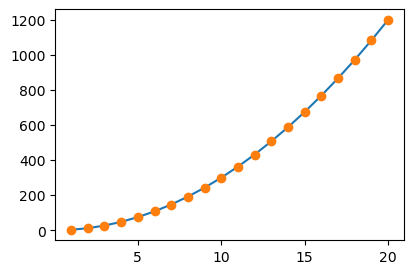

In [16]:
L=3
Lx=L; Ly=L; Lz=L
Lattice = FFCCLattice_chain(Lx, Ly, Lz)    
# ###################################################
####
num_fusions = Lattice.num_fusions
qbts_in_fusions = Lattice.qbts_in_fusions
qbts_in_resource_states = Lattice.qbts_in_resource_states
num_res_states = Lattice.num_res_states

Lattice.get_fusions_primal_isZZ()
fusions_primal_isZZ = Lattice.fusions_primal_isZZ
num_qubits_res_state = Lattice.num_qubits_res_state*Lattice.lattice_z_size # no. of qubit in res state grows with z! !!!!!!!!!!!

Lattice.get_fusions_layer_order() # fusion indices layer by layer
fusions_layer_order = Lattice.fusions_layer_order
fusion_for_qubits = Lattice.fusion_for_qubits

for layer_ix in range(num_qubits_res_state):
    fus_ix_layer = np.where(fusions_layer_order == layer_ix)[0]
#     print(fus_ix_layer,len(fus_ix_layer))


#############
# number of encoded fusions on each layer = 3* L**2
L_list = np.arange(20)+1
n_fus_per_layer = []
for L_ix,L in enumerate(L_list):
    Lx=L; Ly=L; Lz=L
    Lattice = FFCCLattice_chain(Lx, Ly, Lz)    
    # ###################################################
    ####
    num_fusions = Lattice.num_fusions
    qbts_in_fusions = Lattice.qbts_in_fusions
    qbts_in_resource_states = Lattice.qbts_in_resource_states
    num_res_states = Lattice.num_res_states

    Lattice.get_fusions_primal_isZZ()
    fusions_primal_isZZ = Lattice.fusions_primal_isZZ
    num_qubits_res_state = Lattice.num_qubits_res_state*Lattice.lattice_z_size # no. of qubit in res state grows with z! !!!!!!!!!!!

    Lattice.get_fusions_layer_order() # fusion indices layer by layer
    fusions_layer_order = Lattice.fusions_layer_order
    fusion_for_qubits = Lattice.fusion_for_qubits

    n_fus_per_layer.append(len(np.where(fusions_layer_order == 0)[0]))
    
plt.plot(L_list,3*L_list**2,'-')
plt.plot(L_list,n_fus_per_layer,'o')

# Rough simulation of time cost witout wrapped functions

In [68]:
# RUS functions for sampling logical fusion outcomes, set r=0 to get p_XXZZ_RUS_func
def p_XXZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_success = (1-p_fail)*( 1 - p_e_XX ) # prob of not getting both physical XX and ZZ fusion outcome 
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = eta**2 * p_success + eta**2 * p_success * ( (1- (eta**2*p_fail_but_XX)**N_rep) / (1-eta**2*p_fail_but_XX) - 1)
    return result

def p_ZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = 1- (p_XXZZ_dist_func(eta, N_rep, r, p_fail = p_fail) + p_XX_dist_func(eta, N_rep, r, p_fail = p_fail) + p_erase_dist_func(eta, N_rep, r, p_fail = p_fail)) # if writing in 1-a-b-c this gives floating point error where N_rep=1 it is negative
    return result

def p_XX_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    return (p_fail_but_XX*eta**2)**N_rep

def p_erase_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    p_fail_no_XX = p_fail * (p_e_XX)
    p_success_no_XX = (1-p_fail) * (p_e_XX)
    if eta == 1: # consider limiting case for no loss
        final = p_fail_but_XX**(N_rep-1) * p_fail_no_XX
    else:
        a = eta**2 * p_fail_but_XX / (1-eta**2)
        final = (1-eta**2)**(N_rep-1) * (1-a**(N_rep)) / (1-a)  * ( (1-eta**2) + eta**2 * p_fail_no_XX  )
    return final

In [69]:
RUS_lost_outcomes_list = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])  # [XX, ZZ] for each case. 0 means no loss in logical XX
    # All 4 cases are [XX (lost in ZZ), ZZ (lost in XX), erasure, XXZZ] for logical fusion
RUS_lost_outcomes_index = [0, 1, 2, 3]

def prepare_time(p_loss, m_max, p_fusion_success, L, RUS_lost_outcomes_list, RUS_lost_outcomes_index):

    ##
    Lattice = FFCCLattice_chain(L, L, L)    
    num_fusions = Lattice.num_fusions
    num_qubits_res_state = Lattice.num_qubits_res_state*Lattice.lattice_z_size # no. of qubit in res state grows with z! !!!!!!!!!!!

    Lattice.get_fusions_layer_order() # fusion indices layer by layer
    fusions_layer_order = Lattice.fusions_layer_order
    ##
    
    probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]

    RUS_outcomes_XXZZ_indice_ = np.random.choice(RUS_lost_outcomes_index, num_fusions, p=probs_RUS_lost_outcomes_list)#.astype(dtype=np.int8)
    
    ####### Obtain list of m for each encoded fusion ###########
    # Probabilities for getting logical XXZZ in different numbers of attempts
    probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_index = [i+1 for i in range(m_max)]
    all_XXZZ_indices = np.random.choice(attempt_index, num_fusions, p=probs_XXZZ_attempt_list / np.sum(probs_XXZZ_attempt_list))

    # Probabilities for getting logical ZZ in different numbers of attempts
    probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    if not np.any(probs_ZZ_attempt_list): # if probs_ZZ_attempt_list is not all zeros, meaning there is loss or distinguishability
        all_ZZ_indices = None # then there should not be logical ZZ only, which means elif RUS_outcomes_XXZZ_indice[log_fus_ix] == 1: will not run
    else:
        ZZ_attempt_index = [i+1 for i in range(m_max)]
        all_ZZ_indices = np.random.choice(ZZ_attempt_index, num_fusions, p=probs_ZZ_attempt_list / np.sum(probs_ZZ_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    all_erasure_indices = np.random.choice(attempt_index, num_fusions, p=probs_erasure_attempt_list / np.sum(probs_erasure_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_XX_index = [m_max for i in range(m_max)]
    all_XX_indices = np.random.choice(attempt_index, num_fusions, p=probs_XX_attempt_list / np.sum(probs_XX_attempt_list))

    # list of number of physical fusion attempts for each encoded RUS fusion
    m_list = np.empty(num_fusions, dtype=np.int8)

    # Create masks by comparing array to each RUS_lost_outcomes_index
    xxzz_mask = (RUS_outcomes_XXZZ_indice_ == 3)
    zz_mask = (RUS_outcomes_XXZZ_indice_ == 1)
    xx_mask = (RUS_outcomes_XXZZ_indice_ == 0)
    erasure_mask = (RUS_outcomes_XXZZ_indice_ == 2)

    m_list[xxzz_mask] = all_XXZZ_indices[xxzz_mask]
    m_list[zz_mask] = all_ZZ_indices[zz_mask]
    m_list[xx_mask] = all_XX_indices[xx_mask]
    m_list[erasure_mask] = all_erasure_indices[erasure_mask]


    time_resource_state = 0
    for layer_ix in range(num_qubits_res_state):
        fus_ix_layer = np.where(fusions_layer_order == layer_ix)[0]
        time_resource_state += 2*np.max(m_list[list(fus_ix_layer)])+1
#         print(len(fus_ix_layer),np.max(m_list[list(fus_ix_layer)]))
        
    return time_resource_state#, m_list, RUS_outcomes_XXZZ_indice_, all_XXZZ_indices[xxzz_mask], all_ZZ_indices[zz_mask], all_XX_indices[xx_mask]


In [4]:
L_list = np.array([4,6,8,10,20])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.11, 30)
m = 10
n_encodedfus = np.empty(shape=(len(L_list),len(eras_ps)))
for L_ix,L in enumerate(L_list):
    for loss_ix,loss_i in enumerate(eras_ps):
        n_encodedfus_ = prepare_time(loss_i, m, 0.5, L, RUS_lost_outcomes_list, RUS_lost_outcomes_index)
        n_encodedfus[L_ix,loss_ix] = n_encodedfus_
n_encodedfus

array([[ 340.,  332.,  326.,  330.,  368.,  360.,  314.,  372.,  308.,
         342.,  324.,  334.,  330.,  312.,  302.,  312.,  300.,  306.,
         312.,  308.,  332.,  302.,  302.,  334.,  290.,  318.,  292.,
         300.,  314.,  306.],
       [ 586.,  594.,  572.,  580.,  582.,  580.,  562.,  574.,  562.,
         594.,  536.,  562.,  568.,  534.,  540.,  570.,  548.,  542.,
         530.,  542.,  524.,  532.,  540.,  532.,  506.,  554.,  544.,
         518.,  524.,  530.],
       [ 820.,  846.,  852.,  816.,  832.,  808.,  832.,  794.,  834.,
         814.,  798.,  810.,  790.,  804.,  814.,  782.,  790.,  818.,
         784.,  792.,  778.,  784.,  764.,  774.,  756.,  774.,  798.,
         734.,  772.,  762.],
       [1076., 1126., 1070., 1080., 1082., 1064., 1076., 1100., 1070.,
        1088., 1082., 1032., 1062., 1092., 1042., 1034., 1042., 1048.,
        1046., 1050., 1020., 1024., 1030., 1012., 1000., 1040.,  990.,
         988.,  984., 1026.],
       [2434., 2404., 2442.,

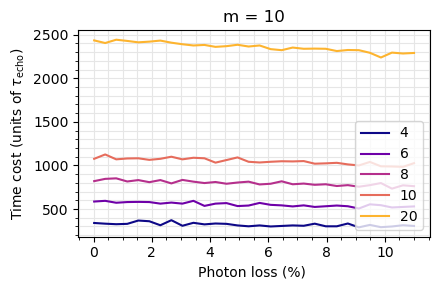

In [5]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
for L_ix, L in enumerate(L_list):
    plt.plot(eras_ps*100, n_encodedfus[L_ix],label=r"{}".format(L), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Time cost (units of $\tau_{\text{echo}}$)")
plt.title(f'm = {m}');plt.minorticks_on();#plt.legend(loc=(1.05,0))
plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()


In [3]:
def prepare_time_pool(p_loss, m_max, p_fusion_success, RUS_lost_outcomes_list, RUS_lost_outcomes_index, num_qubits_res_state, fusions_layer_order, num_fusions):
    
    probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]

    RUS_outcomes_XXZZ_indice_ = np.random.choice(RUS_lost_outcomes_index, num_fusions, p=probs_RUS_lost_outcomes_list)#.astype(dtype=np.int8)
    
    ####### Obtain list of m for each encoded fusion ###########
    # Probabilities for getting logical XXZZ in different numbers of attempts
    probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_index = [i+1 for i in range(m_max)]
    all_XXZZ_indices = np.random.choice(attempt_index, num_fusions, p=probs_XXZZ_attempt_list / np.sum(probs_XXZZ_attempt_list))

    # Probabilities for getting logical ZZ in different numbers of attempts
    probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    if not np.any(probs_ZZ_attempt_list): # if probs_ZZ_attempt_list is not all zeros, meaning there is loss or distinguishability
        all_ZZ_indices = None # then there should not be logical ZZ only, which means elif RUS_outcomes_XXZZ_indice[log_fus_ix] == 1: will not run
    else:
        ZZ_attempt_index = [i+1 for i in range(m_max)]
        all_ZZ_indices = np.random.choice(ZZ_attempt_index, num_fusions, p=probs_ZZ_attempt_list / np.sum(probs_ZZ_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    all_erasure_indices = np.random.choice(attempt_index, num_fusions, p=probs_erasure_attempt_list / np.sum(probs_erasure_attempt_list))

    # list of number of physical fusion attempts for each encoded RUS fusion
    m_list = np.empty(num_fusions, dtype=np.int8)

    # Create masks by comparing array to each RUS_lost_outcomes_index
    xxzz_mask = (RUS_outcomes_XXZZ_indice_ == 3)
    zz_mask = (RUS_outcomes_XXZZ_indice_ == 1)
    xx_mask = (RUS_outcomes_XXZZ_indice_ == 0)
    erasure_mask = (RUS_outcomes_XXZZ_indice_ == 2)

    m_list[xxzz_mask] = all_XXZZ_indices[xxzz_mask]
    m_list[zz_mask] = all_ZZ_indices[zz_mask]
    m_list[xx_mask] = m_max
    m_list[erasure_mask] = all_erasure_indices[erasure_mask]


    time_resource_state = 0
    for layer_ix in range(num_qubits_res_state):
        fus_ix_layer = np.where(fusions_layer_order == layer_ix)[0]
        time_resource_state += 2*np.max(m_list[list(fus_ix_layer)])+1
        
    return time_resource_state

In [ ]:
import multiprocessing
from itertools import repeat

L_list = np.array([4,6,8])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.11, 5)
m = 3 # max attempt

n_encodedfus = []
print('Start pooling...')
for L_ix,L in enumerate(L_list):
    print(L)
    ##
    Lattice = FFCCLattice_chain(L, L, L)    
    num_fusions = Lattice.num_fusions
    num_qubits_res_state = Lattice.num_qubits_res_state*Lattice.lattice_z_size # no. of qubit in res state grows with z! !!!!!!!!!!!

    Lattice.get_fusions_layer_order() # fusion indices layer by layer
    fusions_layer_order = Lattice.fusions_layer_order
    ##
    p_fusion_success = 0.5
    RUS_lost_outcomes_list = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])  # [XX, ZZ] for each case. 0 means no loss in logical XX
    # All 4 cases are [XX (lost in ZZ), ZZ (lost in XX), erasure, XXZZ] for logical fusion
    RUS_lost_outcomes_index = [0, 1, 2, 3]

    
    pool = multiprocessing.Pool()
    n_encodedfus_ = pool.starmap(prepare_time_pool,
                                 zip(eras_ps, repeat(m), repeat(p_fusion_success), repeat(RUS_lost_outcomes_list),
                                     repeat(RUS_lost_outcomes_index), repeat(num_qubits_res_state),  
                                     repeat(fusions_layer_order), repeat(num_fusions)))
    print(n_encodedfus_)

Start pooling...
4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from timeit import default_timer
from time import sleep
from copy import copy
import matplotlib
from lmfit import CompositeModel, Model
import os, pickle

matplotlib.rcParams['figure.figsize'] = (4.5, 3)

# cm = plt.get_cmap('tab10') 
cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=1.2)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Chain import FFCCLattice_chain
# from FusionLatticesAnalysis.FFCCLattice_Chain_Decoder import decoder_successprob_error_vs_loss_list_parallelized as decoder
from FusionLatticesAnalysis.FFCCLattice_Chain_TimeCost import prepare_time_pool


In [7]:
L_list = np.array([4,6,8,10,20])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.1, 30)
m = 10 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 4
Start pooling...
   Doing L= 6
Start pooling...
   Doing L= 8
Start pooling...
   Doing L= 10
Start pooling...
   Doing L= 20
Start pooling...
Completed in  15.214934699935839  s


In [8]:
time_data

[array([348, 334, 332, 366, 332, 350, 336, 342, 326, 308, 330, 336, 324,
        336, 312, 322, 310, 304, 330, 306, 308, 334, 316, 312, 310, 320,
        342, 326, 320, 310]),
 array([562, 588, 590, 558, 584, 570, 546, 572, 556, 572, 580, 590, 532,
        554, 556, 536, 566, 518, 536, 552, 552, 560, 548, 564, 544, 542,
        538, 542, 550, 534]),
 array([834, 842, 834, 812, 814, 842, 840, 806, 818, 796, 798, 796, 774,
        812, 800, 790, 788, 786, 796, 774, 808, 792, 806, 792, 796, 766,
        790, 782, 770, 772]),
 array([1108, 1118, 1102, 1080, 1084, 1094, 1090, 1102, 1098, 1070, 1074,
        1068, 1032, 1076, 1050, 1048, 1050, 1056, 1072, 1052, 1042, 1020,
        1028, 1034, 1036, 1028, 1034,  996, 1016,  984]),
 array([2444, 2432, 2420, 2420, 2422, 2394, 2384, 2398, 2394, 2376, 2378,
        2400, 2364, 2366, 2374, 2340, 2332, 2368, 2342, 2322, 2348, 2340,
        2330, 2310, 2290, 2298, 2320, 2298, 2284, 2262])]

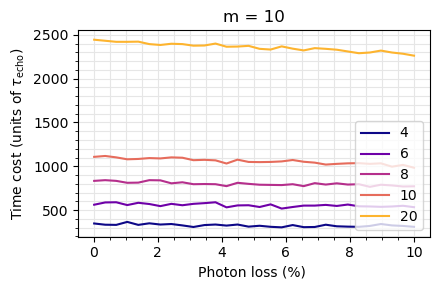

In [9]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
for L_ix, L in enumerate(L_list):
    plt.plot(eras_ps*100, time_data[L_ix],label=r"{}".format(L), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Time cost (units of $\tau_{\text{echo}}$)")
plt.title(f'm = {m}');plt.minorticks_on();#plt.legend(loc=(1.05,0))
plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()


In [ ]:
# same result as the unwrapped version
# can we simulate this for 100 trials?

# Fully wrapped function, with pooling and trials

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from timeit import default_timer
from time import sleep
from copy import copy
import matplotlib
from lmfit import CompositeModel, Model
import os, pickle

matplotlib.rcParams['figure.figsize'] = (4.5, 3)

# cm = plt.get_cmap('tab10') 
cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=1.2)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
cm = plt.get_cmap('viridis_r') 
cNorm  = colors.Normalize(vmin=0, vmax=1.2)
scalarMap2 = cmx.ScalarMappable(norm=cNorm, cmap=cm)

from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Chain import FFCCLattice_chain
# from FusionLatticesAnalysis.FFCCLattice_Chain_Decoder import decoder_successprob_error_vs_loss_list_parallelized as decoder
from FusionLatticesAnalysis.FFCCLattice_Chain_TimeCost import prepare_time_pool


In [8]:
L_list = np.array([4,6,8,10,12,14,16,18,20,22])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.1, 25)
m = 8 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=400)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 4
Start pooling...
   Doing L= 6
Start pooling...
   Doing L= 8
Start pooling...
   Doing L= 10
Start pooling...
   Doing L= 12
Start pooling...
   Doing L= 14
Start pooling...
   Doing L= 16
Start pooling...
   Doing L= 18
Start pooling...
   Doing L= 20
Start pooling...
   Doing L= 22
Start pooling...
Completed in  960.6932559999987  s


In [9]:
figure_name = 'time_Chain_m8_data_new'
time_cost = time_data
data_to_save = {'L_list': L_list, 'eras_ps': eras_ps, 'time_cost': time_cost}


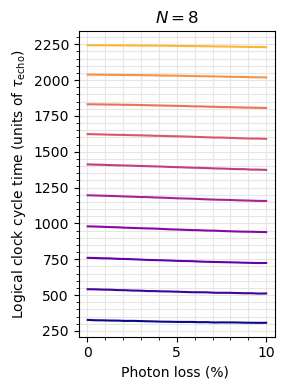

In [10]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure(figsize=(3,4))
for L_ix, L in enumerate(L_list):
#     plt.plot(eras_ps*100, time_data[L_ix],marker='v',ms=6,markerfacecolor='white',
#       markeredgewidth=1,label=r"{}".format(L), color = plots_colors[L_ix])
    plt.plot(eras_ps*100, time_data[L_ix],label=r"$L = {}$".format(L), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Logical clock cycle time (units of $\tau_{\text{echo}}$)")
plt.title(r'$N = {}$'.format(m));plt.minorticks_on();#plt.legend(loc=(1.05,0))
# plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()
plt.savefig('C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Figures\\'+figure_name+'.png'
            , dpi=500,bbox_inches='tight',transparent=True)
saving_folder = 'C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Pickle'
file_name = figure_name + '.pickle'
with open(os.path.join(saving_folder, file_name), 'wb') as handle:
    pickle.dump(data_to_save, handle)

In [11]:
L_list = np.array([3,6])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.08, 10)
m = 8 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=400)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 3
Start pooling...
   Doing L= 6
Start pooling...
Completed in  15.75812230000156  s


In [12]:
time_cost = time_data
data_to_save = {'L_list': L_list, 'eras_ps': eras_ps, 'time_cost': time_cost}
time_cost

[array([221.97 , 220.12 , 218.375, 217.43 , 215.255, 215.67 , 213.095,
        212.545, 211.07 , 209.77 ]),
 array([541.315, 537.965, 534.055, 531.09 , 527.865, 523.915, 521.825,
        519.22 , 516.205, 515.155])]

In [17]:
(2*10+1)*6*22,np.max(time_data[-1])

(2*10+1)*6*12,np.max(time_data[4])

(2*10+1)*6*4,np.max(time_data[0])

(504, 485.88)

In [21]:
p_loss = 0.5; m_max = 10; p_fusion_success = 0.5 

probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]
probs_RUS_lost_outcomes_list

[9.313225746154785e-10,
 0.7895666398108006,
 0.06757621653378008,
 0.14285714272409678]

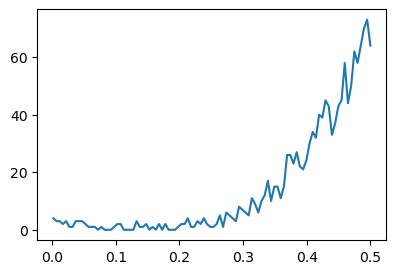

In [41]:
def count_m(p_loss, m_max, p_fusion_success):
    num_fusions = 3000;

    probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                        p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                        p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                        p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]

    RUS_outcomes_XXZZ_indice_ = np.random.choice(RUS_lost_outcomes_index, num_fusions, p=probs_RUS_lost_outcomes_list)#.astype(dtype=np.int8)
    # Probabilities for getting logical XXZZ in different numbers of attempts
    probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_index = [i+1 for i in range(m_max)]
    all_XXZZ_indices = np.random.choice(attempt_index, num_fusions, p=probs_XXZZ_attempt_list / np.sum(probs_XXZZ_attempt_list))

    # Probabilities for getting logical ZZ in different numbers of attempts
    probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    if not np.any(probs_ZZ_attempt_list): # if probs_ZZ_attempt_list is not all zeros, meaning there is loss or distinguishability
        all_ZZ_indices = None # then there should not be logical ZZ only, which means elif RUS_outcomes_XXZZ_indice[log_fus_ix] == 1: will not run
    else:
        ZZ_attempt_index = [i+1 for i in range(m_max)]
        all_ZZ_indices = np.random.choice(ZZ_attempt_index, num_fusions, p=probs_ZZ_attempt_list / np.sum(probs_ZZ_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    all_erasure_indices = np.random.choice(attempt_index, num_fusions, p=probs_erasure_attempt_list / np.sum(probs_erasure_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_XX_index = [m_max for i in range(m_max)]
    all_XX_indices = np.random.choice(attempt_index, num_fusions, p=probs_XX_attempt_list / np.sum(probs_XX_attempt_list))

    # list of number of physical fusion attempts for each encoded RUS fusion
    m_list = np.empty(num_fusions, dtype=np.int8)

    # Create masks by comparing array to each RUS_lost_outcomes_index
    xxzz_mask = (RUS_outcomes_XXZZ_indice_ == 3)
    zz_mask = (RUS_outcomes_XXZZ_indice_ == 1)
    xx_mask = (RUS_outcomes_XXZZ_indice_ == 0)
    erasure_mask = (RUS_outcomes_XXZZ_indice_ == 2)

    m_list[xxzz_mask] = all_XXZZ_indices[xxzz_mask]
    m_list[zz_mask] = all_ZZ_indices[zz_mask]
    m_list[xx_mask] = all_XX_indices[xx_mask]
    m_list[erasure_mask] = all_erasure_indices[erasure_mask]

    return len(np.where(m_list == m)[0])

p_loss_list = np.linspace(0.002,0.5,100)
m_max = 10; p_fusion_success = 0.5
no_of_max_m_list = []
for i in p_loss_list:
    no_of_max_m_list.append(count_m(i, m_max, p_fusion_success))
plt.plot(p_loss_list,no_of_max_m_list)

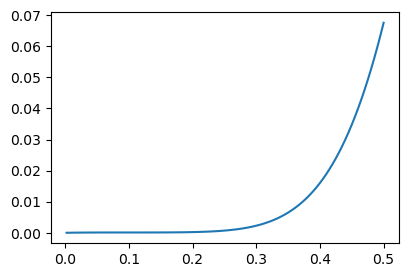

In [47]:
p_erase = []
for i in p_loss_list:
    p_erase.append(p_erase_dist_func(1-i, m_max, 0, p_fail=1-p_fusion_success))
plt.plot(p_loss_list,p_erase)

In [49]:
p_loss = 0.5
probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
probs_erasure_attempt_list

array([0.75      , 0.65625   , 0.50390625, 0.37939453, 0.284729  ,
       0.21356964, 0.16018009, 0.12013543, 0.09010161, 0.06757622])

In [8]:
L_list = np.array([4,6,8])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.1, 30)
m = 10 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=1000)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 4
Start pooling...
   Doing L= 6
Start pooling...
   Doing L= 8
Start pooling...
Completed in  83.23187900008634  s


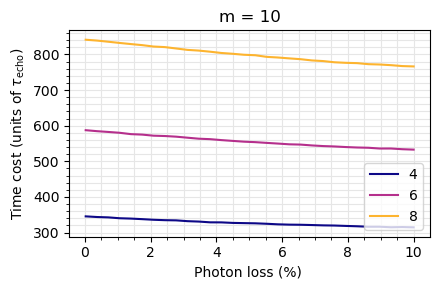

In [9]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
for L_ix, L in enumerate(L_list):
    plt.plot(eras_ps*100, time_data[L_ix],label=r"{}".format(L), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Time cost (units of $\tau_{\text{echo}}$)")
plt.title(f'm = {m}');plt.minorticks_on();#plt.legend(loc=(1.05,0))
plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()


## Plot the no-loss case as a function of L

In [10]:
L_list = np.arange(20)+1
eras_ps = np.array([0.00000001])
m = 10 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=1000)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 1
Start pooling...
   Doing L= 2
Start pooling...
   Doing L= 3
Start pooling...
   Doing L= 4
Start pooling...
   Doing L= 5
Start pooling...
   Doing L= 6
Start pooling...
   Doing L= 7
Start pooling...
   Doing L= 8
Start pooling...
   Doing L= 9
Start pooling...
   Doing L= 10
Start pooling...
   Doing L= 11
Start pooling...
   Doing L= 12
Start pooling...
   Doing L= 13
Start pooling...
   Doing L= 14
Start pooling...
   Doing L= 15
Start pooling...
   Doing L= 16
Start pooling...
   Doing L= 17
Start pooling...
   Doing L= 18
Start pooling...
   Doing L= 19
Start pooling...
   Doing L= 20
Start pooling...
Completed in  340.348548799986  s


In [13]:
time_data
time_data_  = np.concatenate(time_data)
time_data_

array([  43.308,  128.754,  232.74 ,  345.136,  463.484,  586.864,
        713.666,  841.612,  972.086, 1104.2  , 1237.242, 1370.144,
       1502.96 , 1636.512, 1770.752, 1904.038, 2037.896, 2172.2  ,
       2304.814, 2439.308])

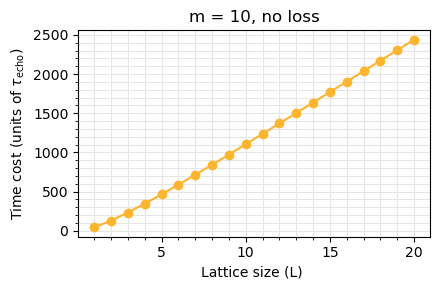

In [19]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure()
plt.plot(L_list, time_data_, '-o',color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Lattice size (L) ");plt.ylabel(r"Time cost (units of $\tau_{\text{echo}}$)")
plt.title(f'N = {m}, no loss');plt.minorticks_on();#plt.legend(loc=(1.05,0))
# plt.legend(loc='lower right')
plt.grid(True, which="both", color='0.9')
fig.tight_layout() # reduce spacing between subplots, before plt.show()


# Plot max m as a function of L

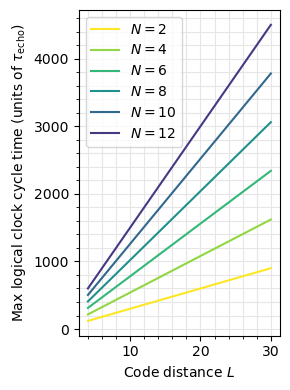

In [7]:
L_list = np.linspace(4,30,30)
m_max_list = np.array([2,4,6,8,10,12])
plots_colors = [scalarMap2.to_rgba(x/(len(m_max_list)-1)) for x in range(len(m_max_list))]
fig = plt.figure(figsize=(3,4))
for idx,m_max in enumerate(m_max_list):
    plt.plot(L_list, (2*m_max+1)*6*L_list, label=r"$N = {}$".format(m_max), color = plots_colors[idx])
plt.yscale('linear');plt.xlabel(r"Code distance $L$ ");plt.ylabel(r"Max logical clock cycle time (units of $\tau_{\text{echo}}$)")
plt.grid(True, which="both", color='0.9')
plt.minorticks_on();plt.legend(loc='best')
fig.tight_layout() # reduce spacing between subplots, before plt.show()

figure_name = 'max_m_L'
plt.savefig('C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Figures\\'+figure_name+'.png'
            , dpi=500,bbox_inches='tight',transparent=True)


In [5]:
import os, pickle
saving_folder = r'C:\Users\MLBit\OneDrive\Documents\Sparrow\Blueprint project\Simulations\QECTime\Pickle'

file_name = 'time_Chain_m8_data.pickle'
with open(os.path.join(saving_folder, file_name) , 'rb') as file:
    all_data = pickle.load(file)

In [7]:
all_data['time_cost']

[array([325.06 , 322.245, 320.38 , 317.695, 315.775, 313.315, 310.535,
        309.17 , 309.185, 306.7  , 306.415, 305.79 , 306.335, 306.19 ,
        307.345, 308.42 , 310.645, 311.735, 315.5  , 316.8  , 319.855,
        325.305, 328.91 , 332.99 , 337.45 , 340.84 , 344.74 , 349.2  ,
        353.155, 356.79 , 361.09 , 365.59 , 368.76 , 372.18 , 375.02 ,
        378.79 , 381.76 , 384.005, 386.105, 388.96 , 390.71 , 392.795,
        394.82 , 396.28 , 397.57 , 398.63 , 399.765, 400.935, 401.595,
        402.295]),
 array([541.375, 537.48 , 532.66 , 529.99 , 525.625, 523.11 , 519.435,
        516.505, 514.605, 512.11 , 510.175, 509.535, 507.53 , 509.63 ,
        509.63 , 511.78 , 514.675, 516.865, 520.385, 524.46 , 530.375,
        534.715, 539.465, 544.905, 550.49 , 556.075, 561.555, 567.065,
        570.9  , 577.07 , 581.905, 584.615, 589.435, 592.655, 595.9  ,
        598.075, 600.205, 602.375, 604.14 , 605.94 , 606.7  , 607.745,
        608.955, 609.4  , 610.   , 610.345, 610.66 , 611.1

# Space cost (average no. of photons per resource state)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from timeit import default_timer
from time import sleep
from copy import copy
import matplotlib
from lmfit import CompositeModel, Model
import os, pickle

matplotlib.rcParams['figure.figsize'] = (4.5, 3)

# cm = plt.get_cmap('tab10') 
cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=0, vmax=1.2)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

from FusionLatticesAnalysis.LatticeFunctions.FFCCLattice_Chain import FFCCLattice_chain
from FusionLatticesAnalysis.FFCCLattice_Chain_TimeCost import prepare_time_pool


In [2]:
L_list = np.array([4,6,8,10,12,14,16,18,20,22])#np.arange(8)+1
eras_ps = np.linspace(0.0002, 0.08, 25)
m = 8 # max attempt

start_t = default_timer()
space_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=100)
    space_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 4
Start pooling...
   Doing L= 6
Start pooling...
   Doing L= 8
Start pooling...
   Doing L= 10
Start pooling...
   Doing L= 12
Start pooling...
   Doing L= 14
Start pooling...
   Doing L= 16
Start pooling...
   Doing L= 18
Start pooling...
   Doing L= 20
Start pooling...
   Doing L= 22
Start pooling...
Completed in  254.36854339999263  s


In [3]:
figure_name = 'space_Chain_m8_data_new'
space_cost = space_data
data_to_save = {'L_list': L_list, 'eras_ps': eras_ps, 'space_cost': space_cost}


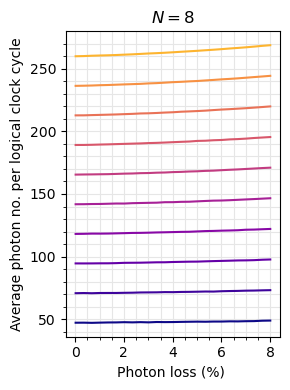

In [6]:
plots_colors = [scalarMap.to_rgba(x/(len(L_list)-1)) for x in range(len(L_list))]
fig = plt.figure(figsize=(3,4))
for L_ix, L in enumerate(L_list):
#     plt.plot(eras_ps*100, time_data[L_ix],marker='v',ms=6,markerfacecolor='white',
#       markeredgewidth=1,label=r"{}".format(L), color = plots_colors[L_ix])
    plt.plot(eras_ps*100, space_data[L_ix],label=r"$L = {}$".format(L), color = plots_colors[L_ix])
plt.yscale('linear');plt.xlabel("Photon loss (%) ");plt.ylabel(r"Average photon no. per logical clock cycle")
plt.title(r'$N = {}$'.format(m));plt.minorticks_on();#plt.legend(loc=(1.05,0))
# plt.legend(loc='upper right')
plt.grid(True, which="both", color='0.9')
# plt.xlim([0,55])
fig.tight_layout() # reduce spacing between subplots, before plt.show()
plt.savefig('C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Figures\\'+figure_name+'.png'
            , dpi=350,bbox_inches='tight',transparent=True)
saving_folder = 'C:\\Users\\MLBit\\OneDrive\\Documents\\Sparrow\\Blueprint project\\Simulations\\QECTime\\Pickle'
file_name = figure_name + '.pickle'
with open(os.path.join(saving_folder, file_name), 'wb') as handle:
    pickle.dump(data_to_save, handle)

In [9]:
space_data[-1],10*22*6 # 6NL


(array([1286.11, 1280.05, 1272.6 , 1263.81, 1256.7 , 1248.5 , 1239.17,
        1230.26, 1225.68, 1218.18, 1210.85, 1205.42, 1199.86, 1196.61,
        1197.76, 1195.32, 1199.59, 1205.16, 1212.82, 1223.48, 1232.52,
        1242.89, 1254.18, 1266.82, 1277.91, 1287.52, 1296.54, 1303.89,
        1309.43, 1313.28, 1316.25, 1318.07, 1319.02, 1319.53, 1319.83,
        1319.96, 1319.99, 1319.99, 1320.  , 1320.  , 1320.  , 1320.  ,
        1320.  , 1320.  , 1320.  , 1320.  , 1320.  , 1320.  , 1320.  ,
        1320.  ]),
 1320)

In [106]:
L_list = np.arange(1)+1
eras_ps = np.array([0.00000001])
m = 2 # max attempt

start_t = default_timer()
time_data = []
for L_ix, L in enumerate(L_list):
    print('   Doing L=', L)
    this_data = prepare_time_pool(eras_ps, m, L, num_trials=3000)
    time_data.append(this_data)
end_t = default_timer()
print('Completed in ', end_t - start_t, ' s')


   Doing L= 1
Start pooling...
Completed in  3.180860699969344  s


In [35]:
time_data

[array([36.31]),
 array([95.714]),
 array([156.344]),
 array([214.25]),
 array([269.648]),
 array([323.958]),
 array([377.996]),
 array([432.]),
 array([486.]),
 array([540.]),
 array([594.]),
 array([648.]),
 array([702.]),
 array([756.]),
 array([810.]),
 array([864.]),
 array([918.]),
 array([972.]),
 array([1026.]),
 array([1080.])]

In [107]:
time_data

[array([26.466])]

In [52]:
time_data_ = np.concatenate(time_data)
(time_data_/6 / L_list - 1)/2

array([2.52583333, 3.48808333, 3.84288889, 3.96354167, 3.99413333,
       3.99941667, 3.99995238, 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ])

In [61]:
p = 1/2
m_ = (1*p**3 + 2*(3*p**4) + (3*3 + 2*3)*p**5 + (4*3)*p**5 + (3*6 + 2*1)*p**6 + (4*6)*p**6 + (3*6)*p**7 + (4*9)*p**7 + (3*3)*p**8 + (4*6)*p**8 + (4*3)*p**7 + (3*1)*p**9 + 4*(3*p**9) + 4*(3*p**8) + 4*(3*p**9) + 4*(p**9))/(p**3 + (3*p**4) + (6*p**5) + 10*p**6 + 12*p**7 + 12*p**8 + 10*p**9 + 6*p**10 + 3*p**11 + p**12)
(2*m_+1)*6*4

186.13333333333333

In [62]:
1*p**3 + (3*p**4) + (3 + 3)*p**5 + (3)*p**5 + (6 + 1)*p**6 + (6)*p**6 + (6)*p**7 + (9)*p**7 + (3)*p**8 + (6)*p**8 + (3)*p**7 + (1)*p**9 + (3*p**9) + (3*p**8) + (3*p**9) + (p**9)

1.0

In [63]:
m_

3.3777777777777778

In [27]:
1+3+6+10+12+12+10+6+3+1

64

In [36]:
(214.25/6/4-1)/2

3.963541666666667

In [58]:
p_loss = 0; m_max = 4; p_fusion_success = 0.5 

# Probabilities for getting logical XXZZ in different numbers of attempts
probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
attempt_index = [i+1 for i in range(m_max)]

# Probabilities for getting logical XX in different numbers of attempts
probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
attempt_XX_index = [m_max for i in range(m_max)]

probs_XXZZ_attempt_list,probs_XX_attempt_list, p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success), p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)

(array([0.5   , 0.25  , 0.125 , 0.0625]),
 array([0.5   , 0.25  , 0.125 , 0.0625]),
 0.9375,
 0.0625)

In [65]:
np.sum(probs_XXZZ_attempt_list), probs_XX_attempt_list[3]

(0.9375, 0.0625)

In [18]:
# RUS functions for sampling logical fusion outcomes, set r=0 to get p_XXZZ_RUS_func
def p_XXZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_success = (1-p_fail)*( 1 - p_e_XX ) # prob of not getting both physical XX and ZZ fusion outcome 
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = eta**2 * p_success + eta**2 * p_success * ( (1- (eta**2*p_fail_but_XX)**N_rep) / (1-eta**2*p_fail_but_XX) - 1)
    return result

def p_ZZ_dist_func(eta, N_rep, r, p_fail = 0.5):
    if np.any(N_rep == 0):
        result = 0.0
    else:
        result = 1- (p_XXZZ_dist_func(eta, N_rep, r, p_fail = p_fail) + p_XX_dist_func(eta, N_rep, r, p_fail = p_fail) + p_erase_dist_func(eta, N_rep, r, p_fail = p_fail)) # if writing in 1-a-b-c this gives floating point error where N_rep=1 it is negative
    return result

def p_XX_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    return (p_fail_but_XX*eta**2)**N_rep

def p_erase_dist_func(eta, N_rep, r, p_fail = 0.5):
    p_e_XX = r/2 - 0.25*r**2 # prob of not getting physical XX outcome, suppose that fusion has already failed
    p_fail_but_XX = p_fail * (1-p_e_XX)  # prob of failed physical fusion but retrieve XX fusion outcome 
    p_fail_no_XX = p_fail * (p_e_XX)
    p_success_no_XX = (1-p_fail) * (p_e_XX)
    if eta == 1: # consider limiting case for no loss
        final = p_fail_but_XX**(N_rep-1) * p_fail_no_XX
    else:
        a = eta**2 * p_fail_but_XX / (1-eta**2)
        final = (1-eta**2)**(N_rep-1) * (1-a**(N_rep)) / (1-a)  * ( (1-eta**2) + eta**2 * p_fail_no_XX  )
    return final

RUS_lost_outcomes_list = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])  # [XX, ZZ] for each case. 0 means no loss in logical XX
    # All 4 cases are [XX (lost in ZZ), ZZ (lost in XX), erasure, XXZZ] for logical fusion
RUS_lost_outcomes_index = [0, 1, 2, 3]

def prepare_time(p_loss, m_max, p_fusion_success, L, RUS_lost_outcomes_list, RUS_lost_outcomes_index):

    ##
    Lattice = FFCCLattice_chain(L, L, L)    
    num_fusions = Lattice.num_fusions
    num_qubits_res_state = Lattice.num_qubits_res_state*Lattice.lattice_z_size # no. of qubit in res state grows with z! !!!!!!!!!!!

    Lattice.get_fusions_layer_order() # fusion indices layer by layer
    fusions_layer_order = Lattice.fusions_layer_order
    ##
    
    probs_RUS_lost_outcomes_list = [p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_ZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_erase_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success),
                                    p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)]

    RUS_outcomes_XXZZ_indice_ = np.random.choice(RUS_lost_outcomes_index, num_fusions, p=probs_RUS_lost_outcomes_list)#.astype(dtype=np.int8)
    
    ####### Obtain list of m for each encoded fusion ###########
    # Probabilities for getting logical XXZZ in different numbers of attempts
    probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_index = [i+1 for i in range(m_max)]
    all_XXZZ_indices = np.random.choice(attempt_index, num_fusions, p=probs_XXZZ_attempt_list / np.sum(probs_XXZZ_attempt_list))

    # Probabilities for getting logical ZZ in different numbers of attempts
    probs_ZZ_attempt_list = np.array([p_ZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_ZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    if not np.any(probs_ZZ_attempt_list): # if probs_ZZ_attempt_list is not all zeros, meaning there is loss or distinguishability
        all_ZZ_indices = None # then there should not be logical ZZ only, which means elif RUS_outcomes_XXZZ_indice[log_fus_ix] == 1: will not run
    else:
        ZZ_attempt_index = [i+1 for i in range(m_max)]
        all_ZZ_indices = np.random.choice(ZZ_attempt_index, num_fusions, p=probs_ZZ_attempt_list / np.sum(probs_ZZ_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_erasure_attempt_list = np.array([p_erase_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    all_erasure_indices = np.random.choice(attempt_index, num_fusions, p=probs_erasure_attempt_list / np.sum(probs_erasure_attempt_list))

    # Probabilities for getting logical erasure in different numbers of attempts
    probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
    attempt_XX_index = [m_max for i in range(m_max)]
    all_XX_indices = np.random.choice(attempt_index, num_fusions, p=probs_XX_attempt_list / np.sum(probs_XX_attempt_list))

    # list of number of physical fusion attempts for each encoded RUS fusion
    m_list = np.empty(num_fusions, dtype=np.int8)

    # Create masks by comparing array to each RUS_lost_outcomes_index
    xxzz_mask = (RUS_outcomes_XXZZ_indice_ == 3)
    zz_mask = (RUS_outcomes_XXZZ_indice_ == 1)
    xx_mask = (RUS_outcomes_XXZZ_indice_ == 0)
    erasure_mask = (RUS_outcomes_XXZZ_indice_ == 2)

    m_list[xxzz_mask] = all_XXZZ_indices[xxzz_mask]
    m_list[zz_mask] = all_ZZ_indices[zz_mask]
    m_list[xx_mask] = all_XX_indices[xx_mask]
    m_list[erasure_mask] = all_erasure_indices[erasure_mask]


    time_resource_state = 0
    for layer_ix in range(num_qubits_res_state):
        fus_ix_layer = np.where(fusions_layer_order == layer_ix)[0]
        time_resource_state += 2*np.max(m_list[list(fus_ix_layer)])+1
#         print(len(fus_ix_layer),m_list[list(fus_ix_layer)],np.max(m_list[list(fus_ix_layer)]))
#         print(fus_ix_layer)
        
    return time_resource_state#, m_list, RUS_outcomes_XXZZ_indice_, all_XXZZ_indices[xxzz_mask], all_ZZ_indices[zz_mask], all_XX_indices[xx_mask]


In [169]:
L_list = 1#np.arange(8)+1
eras_ps = 0.0000001
m = 2
i=0
total_time = 0; trials=1000
while i < trials:
    time = prepare_time(eras_ps, m, 0.5, L_list, RUS_lost_outcomes_list, RUS_lost_outcomes_index)
    i += 1
    total_time += time
total_time/trials
# (total_time/6/L_list-1)/2

26.416

In [113]:
p_loss = 0; m_max = 2; p_fusion_success = 0.5 

# Probabilities for getting logical XXZZ in different numbers of attempts
probs_XXZZ_attempt_list = np.array([p_XXZZ_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success)-p_XXZZ_dist_func(1-p_loss, i, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
attempt_index = [i+1 for i in range(m_max)]

# Probabilities for getting logical XX in different numbers of attempts
probs_XX_attempt_list = np.array([p_XX_dist_func(1-p_loss, i+1, 0, p_fail=1-p_fusion_success) for i in range(m_max)])
attempt_XX_index = [m_max for i in range(m_max)]

probs_XXZZ_attempt_list,probs_XX_attempt_list, p_XXZZ_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success), p_XX_dist_func(1-p_loss, m_max, 0, p_fail=1-p_fusion_success)

(array([0.5 , 0.25]), array([0.5 , 0.25]), 0.75, 0.25)

In [171]:
# what about we do a separate sampling?
probs_outcomes_list = [(1/2)**3 for i in range(8)]
m_max_list = [1, 2, 2, 2, 2, 2, 2, 2]
# (1,1,1), (1,2,1) , (2,1,1), (1,1,2), (1,2,2) , (2,2,1), (2,1,2), (2,2,2)

m_list = np.random.choice(m_max_list, 6, p=probs_outcomes_list)
m_list, np.sum(m_list*2+1)

i=0
total_time = 0; trials=1000
while i < trials:
    m_list = np.random.choice(m_max_list, 6, p=probs_outcomes_list)
    i += 1
    total_time += np.sum(m_list*2+1)
total_time/trials

28.584